In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp
import scipy.stats as st
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')


# Import Data

In [3]:
path = '/content/drive/MyDrive/Rakamin Project/Mini Project Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv'

booking_data = pd.read_csv('hotel_bookings_data.csv')
booking_data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
73626,City Hotel,1,161,2019,October,35,28,1,3,2,...,2,No Deposit,9.0,NaN,0,Personal,178.53,0,0,Canceled
113305,City Hotel,0,237,2019,August,22,2,1,2,2,...,0,No Deposit,14.0,NaN,0,Personal,130.38,0,0,Check-Out
52008,City Hotel,1,2,2018,July,22,28,2,3,2,...,0,No Deposit,9.0,NaN,0,Personal,113.05,0,0,Canceled
68080,City Hotel,1,236,2019,July,19,12,1,2,2,...,0,No Deposit,9.0,NaN,0,Personal,119.10,0,1,Canceled
32540,Resort Hotel,0,0,2019,March,5,29,1,0,2,...,0,No Deposit,NaN,NaN,0,Family,45.00,0,2,Check-Out


# Handle Missing Values

In [4]:
booking_data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
7018,Resort Hotel,1,109,2018,September,29,16,2,5,2,...,0,No Deposit,240.0,NaN,0,Personal,212.0,0,0,Canceled
68613,City Hotel,1,105,2019,July,20,19,0,2,1,...,0,Non Refund,NaN,NaN,0,Personal,160.0,0,0,Canceled
68739,City Hotel,1,75,2019,July,20,20,2,1,2,...,0,No Deposit,229.0,NaN,0,Family,90.0,0,0,Canceled
98452,City Hotel,0,40,2018,November,40,26,1,3,1,...,0,No Deposit,9.0,NaN,0,Personal,149.4,0,2,Check-Out
27140,Resort Hotel,0,194,2018,October,34,15,1,5,2,...,0,No Deposit,6.0,NaN,0,Personal,146.7,0,1,Check-Out
11828,Resort Hotel,1,411,2019,July,22,31,2,4,2,...,0,Non Refund,NaN,NaN,0,Personal,71.1,0,0,Canceled
108138,City Hotel,0,20,2019,May,12,22,0,1,1,...,0,No Deposit,7.0,NaN,0,Personal,62.4,0,0,Check-Out
2061,Resort Hotel,0,50,2017,November,40,30,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,104.0,0,0,Check-Out
53183,City Hotel,1,350,2018,August,25,17,0,2,2,...,0,Non Refund,29.0,NaN,0,Personal,140.0,0,0,Canceled
114662,City Hotel,0,175,2019,August,25,22,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,166.5,0,0,Check-Out


In [5]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
booking_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [8]:
missing_percentage(booking_data)

,Total,Percent
company,112593,94.31
agent,16340,13.69
city,488,0.41
children,4,NaN


Because `city` and `children` missing values percentage is under 5%, we will drop the missing values

In [9]:
booking_data = booking_data.dropna(subset=['city', 'children'])
missing_percentage(booking_data)

,Total,Percent
company,112275,94.43
agent,16004,13.46


In [10]:
booking_data['agent'] = booking_data['agent'].fillna(0)
booking_data['company'] = booking_data['company'].fillna(0)

We decided to fill missing values in `agent` and `company`, it's because tha values from that features is a code from travel agent or company agent, if it's missing, then the guest it's not using travel agency

In [11]:
missing_percentage(booking_data)

,Total,Percent


# Handle Duplicated Values

In [12]:
booking_data.duplicated().sum()

33223

In [13]:
booking_data = booking_data.drop_duplicates()

In [14]:
booking_data.duplicated().any()

False

# Data Preprocessing

In [15]:
booking_data['meal'] = booking_data['meal'].replace(['Undefined'], 'No Meal')
booking_data['meal'].value_counts()

Breakfast     66674
No Meal        9885
Dinner         8769
Full Board      347
Name: meal, dtype: int64

Combine `undefined` category from Meal column with `no_meal`

In [16]:
booking_data['children'] = booking_data['children'].astype('int64')
booking_data['agent'] = booking_data['agent'].astype('int64')
booking_data['company'] = booking_data['company'].astype('int64')

In [17]:
booking_data['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [18]:
booking_data['total_guest'] = booking_data['adults'] + booking_data['children'] + booking_data['babies']
booking_data['total_stay_days'] = booking_data['stays_in_weekdays_nights'] + booking_data['stays_in_weekdays_nights']
df_clean = booking_data[(booking_data['total_guest'] > 0) &
                        (booking_data['total_stay_days'] > 0)]

In [19]:
df_clean.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay_days
61959,City Hotel,1,295,2018,February,53,29,0,3,2,...,9,0,0,Personal,79.50,0,1,Canceled,2,6
3457,Resort Hotel,0,66,2017,February,50,12,2,5,2,...,115,0,0,Personal,56.70,0,0,Check-Out,2,10
20151,Resort Hotel,0,0,2018,March,3,15,0,2,2,...,0,0,0,Personal,67.00,1,0,Check-Out,2,4
2617,Resort Hotel,0,13,2017,December,43,23,0,2,2,...,240,0,0,Personal,73.00,1,0,Check-Out,2,4
16361,Resort Hotel,0,59,2017,October,34,20,2,4,2,...,156,0,0,Personal,133.00,0,0,Check-Out,2,8
19976,Resort Hotel,0,44,2019,August,23,7,0,1,1,...,0,108,0,Family,75.00,0,0,Check-Out,1,2
39420,Resort Hotel,0,20,2019,October,33,13,2,2,2,...,250,0,0,Personal,254.00,0,1,Check-Out,4,4
115529,City Hotel,0,7,2019,September,27,6,0,1,2,...,14,0,0,Personal,118.00,0,0,Check-Out,2,2
86789,City Hotel,0,0,2018,June,15,7,0,2,2,...,9,0,0,Personal,89.00,0,1,Check-Out,2,4
7042,Resort Hotel,1,185,2018,September,30,17,2,5,2,...,240,0,0,Personal,172.86,0,0,Canceled,2,10


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79521 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79521 non-null  object 
 1   is_canceled                     79521 non-null  int64  
 2   lead_time                       79521 non-null  int64  
 3   arrival_date_year               79521 non-null  int64  
 4   arrival_date_month              79521 non-null  object 
 5   arrival_date_week_number        79521 non-null  int64  
 6   arrival_date_day_of_month       79521 non-null  int64  
 7   stays_in_weekend_nights         79521 non-null  int64  
 8   stays_in_weekdays_nights        79521 non-null  int64  
 9   adults                          79521 non-null  int64  
 10  children                        79521 non-null  int64  
 11  babies                          79521 non-null  int64  
 12  meal                           

After cleaning the dataset, we managed to get 79521 values from 119390 values.


# Monthly Hotel Bookings

In [21]:
dfgb = df_clean.copy()

In [22]:
dfgb['arrival_date_year'].value_counts()

2018    38375
2019    29318
2017    11828
Name: arrival_date_year, dtype: int64

In [23]:
dfgb.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()

arrival_date_year  arrival_date_month
2017               December              2323
                   February              1743
                   January               1452
                   November              2514
                   October               2234
                   September             1562
2018               April                 2521
                   August                3145
                   December              3732
                   February              2889
                   January               3065
                   July                  3314
                   June                  3446
                   March                 1622
                   May                   3523
                   November              3419
                   October               4109
                   September             3590
2019               April                 2993
                   August                4008
                   July                  4

In [24]:
dfgb2 = dfgb.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
dfgb2.columns = ['Hotel','Arrival_Month','Year_Num','Total']
dfgb2['Average_bookings'] = round(dfgb2['Total']/dfgb2['Year_Num'],0)
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dfgb2['month'] = dfgb2['Arrival_Month'].str[:3]
dfgb2['month'] = pd.Categorical(dfgb2['month'], categories=ordered_months, ordered=True)
dfgb2

,Hotel,Arrival_Month,Year_Num,Total,Average_bookings,month
0,City Hotel,April,2,3313,1656.0,Apr
1,City Hotel,August,2,4567,2284.0,Aug
2,City Hotel,December,2,3698,1849.0,Dec
3,City Hotel,February,2,2780,1390.0,Feb
4,City Hotel,January,2,2697,1348.0,Jan
5,City Hotel,July,2,4933,2466.0,Jul
6,City Hotel,June,2,4731,2366.0,Jun
7,City Hotel,March,2,2485,1242.0,Mar
8,City Hotel,May,2,4553,2276.0,May
9,City Hotel,November,2,3663,1832.0,Nov


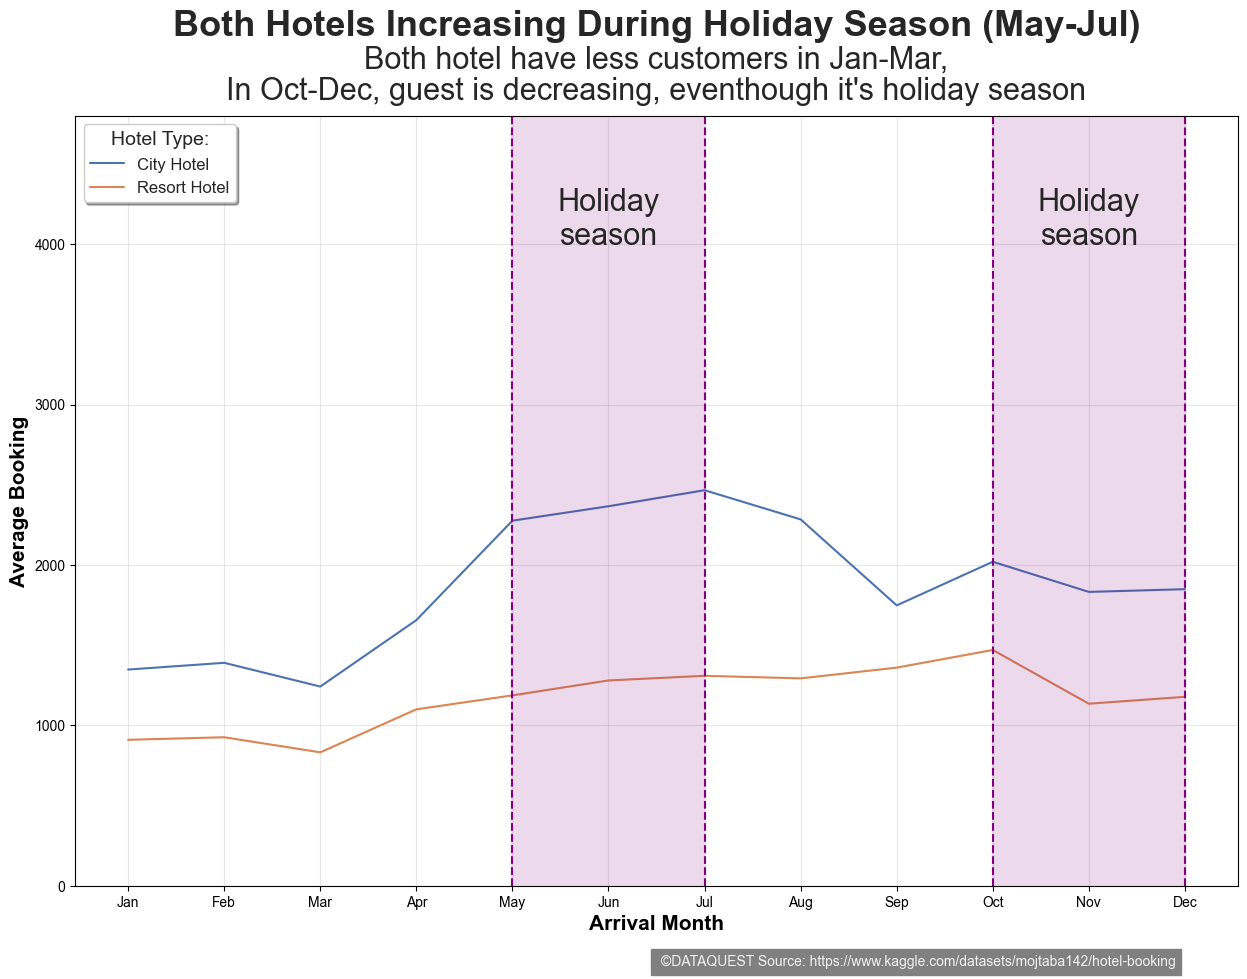

In [25]:
plt.figure(figsize=(15,10))

plt.grid(alpha=0.3)
sns.set_theme( style='whitegrid', palette='deep')
sns.lineplot(x='month',y='Average_bookings', hue= 'Hotel', sizes= (6,4), data=dfgb2)

plt.text(x=5.5, y=5300, s='Both Hotels Increasing During Holiday Season (May-Jul)', fontsize=26, fontweight='bold', ha= 'center')
plt.text(x=5.5, y=5100, s='Both hotel have less customers in Jan-Mar,', fontsize=22, ha= 'center')
plt.text(x=5.5, y=4900, s="In Oct-Dec, guest is decreasing, eventhough it's holiday season", fontsize=22, ha= 'center')

plt.text(x=5, y=4000, s="Holiday\nseason", fontsize=22, ha= 'center')

plt.text(x=10, y=4000, s="Holiday\nseason", fontsize=22, ha= 'center')

plt.axvline(4, color='purple', linestyle='--', ymin=0, ymax=2)
plt.axvline(6, color='purple', linestyle='--', ymin=0, ymax=2)
plt.axvline(5, color='purple', linestyle='-', ymin=0, ymax=2, lw = 140, alpha = .15)

plt.axvline(9, color='purple', linestyle='--', ymin=0, ymax=2)
plt.axvline(11, color='purple', linestyle='--', ymin=0, ymax=2)
plt.axvline(10, color='purple', linestyle='-', ymin=0, ymax=2, lw = 140, alpha = .15)

plt.text(x = 5.5, y = -500,
         s = ' ©DATAQUEST Source: https://www.kaggle.com/datasets/mojtaba142/hotel-booking',fontsize = 10, 
         color = '#f0f0f0', backgroundcolor = 'grey')

plt.legend(title='Hotel Type:', title_fontsize=14, prop={'size':12}, fontsize='x-large', loc ="upper left", fancybox=True, shadow= True)

plt.xlabel('Arrival Month', fontsize=15,fontweight='bold')
plt.ylabel('Average Booking', fontsize=15,fontweight='bold')
plt.ylim(0,4800)
plt.savefig('avg_num_booking.png', dpi=200)

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates


In [26]:
df3 = df_clean.copy()

In [27]:
df3['total_stay_days'].value_counts()

2     21551
4     20205
6     15982
10     9576
8      7778
12     1365
14      958
20      957
16      608
18      216
30       67
22       49
24       40
40       39
26       27
28       23
38       20
42       14
32       12
44        6
50        6
36        6
60        4
34        4
48        2
80        2
66        1
64        1
52        1
68        1
Name: total_stay_days, dtype: int64

- We see that guests spent 2 days stay
- we decided to seperate into 3 groups
- Short term for guest who stay for 2 days
- middle term for guest who stay under a week
- and long term for guest who stay more than a week

In [28]:
stay_group = []
for i in df3['total_stay_days']:
    if i >= 1 and i <= 2:
        group = 'Short Term'
    elif i >= 2 and i <= 7:
        group = 'Middle Term'
    else: 
        group = 'Long Term'
    stay_group.append(group)
df3['stay_segment'] = stay_group

In [29]:
df3.sample(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay_days,stay_segment
17569,Resort Hotel,0,1,2017,December,42,13,0,2,2,...,0,0,Personal,56.40,1,1,Check-Out,2,4,Middle Term
100164,City Hotel,0,0,2018,December,43,18,1,5,1,...,216,0,Personal,120.00,0,0,Check-Out,1,10,Long Term
68981,City Hotel,1,166,2019,July,21,24,0,2,2,...,0,0,Personal,108.00,0,1,Canceled,2,4,Middle Term
107627,City Hotel,0,6,2019,May,11,15,0,1,1,...,443,0,Family,65.00,0,1,Check-Out,1,2,Short Term
102836,City Hotel,0,50,2018,February,49,3,2,2,1,...,0,0,Personal,63.75,0,0,Check-Out,1,4,Middle Term
19058,Resort Hotel,0,3,2017,February,49,5,2,1,2,...,0,0,Family,57.67,1,0,Check-Out,2,2,Short Term
45355,City Hotel,0,61,2017,December,44,26,1,1,2,...,0,0,Personal,72.24,0,1,Check-Out,2,2,Short Term
33092,Resort Hotel,0,98,2019,April,6,10,2,3,2,...,0,0,Personal,53.80,1,2,Check-Out,2,6,Middle Term
35762,Resort Hotel,0,96,2019,June,17,29,1,1,2,...,0,0,Personal,80.00,1,1,Check-Out,3,2,Short Term
96845,City Hotel,0,71,2018,November,36,1,2,6,2,...,0,0,Personal,150.98,0,3,Check-Out,3,12,Long Term


In [30]:
df3['stay_segment'].value_counts()

Middle Term    36187
Long Term      21783
Short Term     21551
Name: stay_segment, dtype: int64

In [31]:
df3gb = df3.groupby(['hotel','is_canceled','stay_segment']).agg({'arrival_date_month' : 'count'}).reset_index()
df3gb

,hotel,is_canceled,stay_segment,arrival_date_month
0,City Hotel,0,Long Term,5395
1,City Hotel,0,Middle Term,17820
2,City Hotel,0,Short Term,10500
3,City Hotel,1,Long Term,3307
4,City Hotel,1,Middle Term,8026
5,City Hotel,1,Short Term,3678
6,Resort Hotel,0,Long Term,9332
7,Resort Hotel,0,Middle Term,7699
8,Resort Hotel,0,Short Term,6199
9,Resort Hotel,1,Long Term,3749


In [32]:
df3_pivot = df3gb.pivot_table(index = ['hotel','stay_segment'],
                              columns = ['is_canceled'],
                              values = ['arrival_date_month']).reset_index()
df3_pivot.columns = ['Hotel', 'Segmentation', 'Not_Cancel', 'Cancel']
df3_pivot

,Hotel,Segmentation,Not_Cancel,Cancel
0,City Hotel,Long Term,5395,3307
1,City Hotel,Middle Term,17820,8026
2,City Hotel,Short Term,10500,3678
3,Resort Hotel,Long Term,9332,3749
4,Resort Hotel,Middle Term,7699,2642
5,Resort Hotel,Short Term,6199,1174


In [33]:
df3_pivot['Cancel_Rate'] = round(df3_pivot['Cancel']/(df3_pivot['Cancel']+df3_pivot['Not_Cancel'])*100,0)

In [34]:
df3_pivot = df3_pivot.sort_values('Cancel_Rate', ascending = True)
df3_pivot

,Hotel,Segmentation,Not_Cancel,Cancel,Cancel_Rate
5,Resort Hotel,Short Term,6199,1174,16.0
2,City Hotel,Short Term,10500,3678,26.0
4,Resort Hotel,Middle Term,7699,2642,26.0
3,Resort Hotel,Long Term,9332,3749,29.0
1,City Hotel,Middle Term,17820,8026,31.0
0,City Hotel,Long Term,5395,3307,38.0


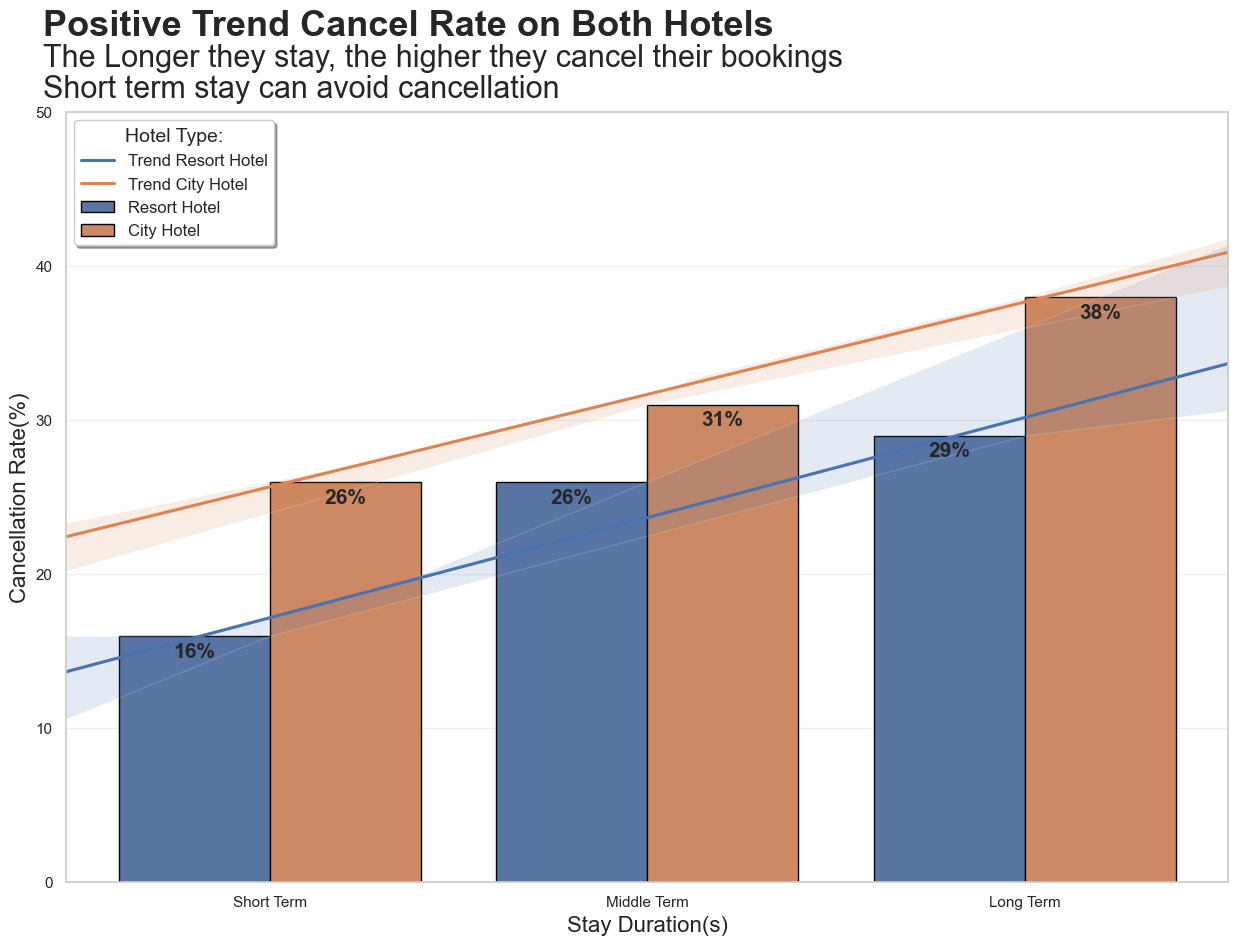

In [35]:
plt.figure(figsize=(15,10))

plt.grid(alpha=0.3)
sns.set_theme( style='whitegrid', palette='deep')
sns.barplot(x='Segmentation',y='Cancel_Rate', hue= 'Hotel', data=df3_pivot, edgecolor = 'black')

sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['Hotel'] == 'City Hotel'])), y='Cancel_Rate', 
            data=df3_pivot[df3_pivot['Hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False,ci=50)
sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['Hotel'] == 'City Hotel'])), y='Cancel_Rate', 
            data=df3_pivot[df3_pivot['Hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False,ci=50)

plt.text(x=-0.6, y=55, s='Positive Trend Cancel Rate on Both Hotels', fontsize=26, fontweight='bold', ha= 'left')
plt.text(x=-0.6, y=53, s='The Longer they stay, the higher they cancel their bookings', fontsize=22, ha= 'left')
plt.text(x=-0.6, y=51, s="Short term stay can avoid cancellation", fontsize=22, ha= 'left')

plt.text(x = 2.2, y = 37, s = "38%", ha='center', va='center',fontsize=15, weight = 'bold')
plt.text(x = 1.8, y = 28, s = "29%", ha='center', va='center',fontsize=15, weight = 'bold')
plt.text(x = 1.2, y = 30, s = "31%", ha='center', va='center',fontsize=15, weight = 'bold')
plt.text(x = 0.8, y = 25, s = "26%", ha='center', va='center',fontsize=15, weight = 'bold')
plt.text(x = 0.2, y = 25, s = "26%", ha='center', va='center',fontsize=15, weight = 'bold')
plt.text(x = -0.20, y = 15, s = "16%", ha='center', va='center', fontsize=15, weight = 'bold')

plt.legend(title='Hotel Type:', title_fontsize=14, prop={'size':12}, fontsize='x-large', loc ="upper left", fancybox=True, shadow= True)
plt.xlabel('Stay Duration(s)', fontsize=16)
plt.ylabel('Cancellation Rate(%)', fontsize=16)
plt.ylim(0, 50)
plt.savefig('cancel_rate_stay.png', dpi=200)

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate


In [36]:
df5 = df_clean.copy()

In [37]:
lead_time_list=[]
for i in df5['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 60:
        lead_group = '2 Months'
    elif i >= 61 and i <= 90:
        lead_group = '3 Months'
    elif i >= 91 and i <= 120:
        lead_group = '4 Months'
    elif i >= 121 and i <= 150:
        lead_group = '5 Months'
    elif i >= 151 and i <= 180:
        lead_group = '6 Months'
    elif i >= 181 and i <= 210:
        lead_group = '7 Months'
    elif i >= 211 and i <= 240:
        lead_group = '8 Months'
    elif i >= 241 and i <= 270:
        lead_group = '9 Months'
    elif i >= 271 and i <= 300:
        lead_group = '10 Months'
    elif i >= 301 and i <= 330:
        lead_group = '11 Months'
    elif i >= 331 and i <= 360:
        lead_group = '12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df5['lead_time_group'] = lead_time_list

In [38]:
df5['lead_time_group'].value_counts()

1 Month       29756
2 Months      12408
3 Months       8825
4 Months       6887
5 Months       5477
6 Months       5048
7 Months       3564
8 Months       2581
9 Months       1649
10 Months      1193
11 Months       945
>12 Months      594
12 Months       594
Name: lead_time_group, dtype: int64

In [39]:
df5gb = df5.groupby(['hotel','is_canceled','lead_time_group']).agg({'arrival_date_month' : 'count'}).reset_index()
df5_pivot = df5gb.pivot_table(index = ['hotel','lead_time_group'],
                              columns = ['is_canceled'],
                              values = ['arrival_date_month']).reset_index()
df5_pivot.columns = ['Hotel', 'lead_time_group', 'Not_Cancel', 'Cancel']
df5_pivot['Cancel_Rate'] = round(df5_pivot['Cancel']/(df5_pivot['Cancel']+df5_pivot['Not_Cancel'])*100,0)
df5_pivot

,Hotel,lead_time_group,Not_Cancel,Cancel,Cancel_Rate
0,City Hotel,1 Month,14213,3581,20.0
1,City Hotel,10 Months,304,317,51.0
2,City Hotel,11 Months,192,259,57.0
3,City Hotel,12 Months,85,154,64.0
4,City Hotel,2 Months,5489,2713,33.0
5,City Hotel,3 Months,3908,1982,34.0
6,City Hotel,4 Months,2933,1629,36.0
7,City Hotel,5 Months,2216,1274,37.0
8,City Hotel,6 Months,1781,1137,39.0
9,City Hotel,7 Months,1213,811,40.0


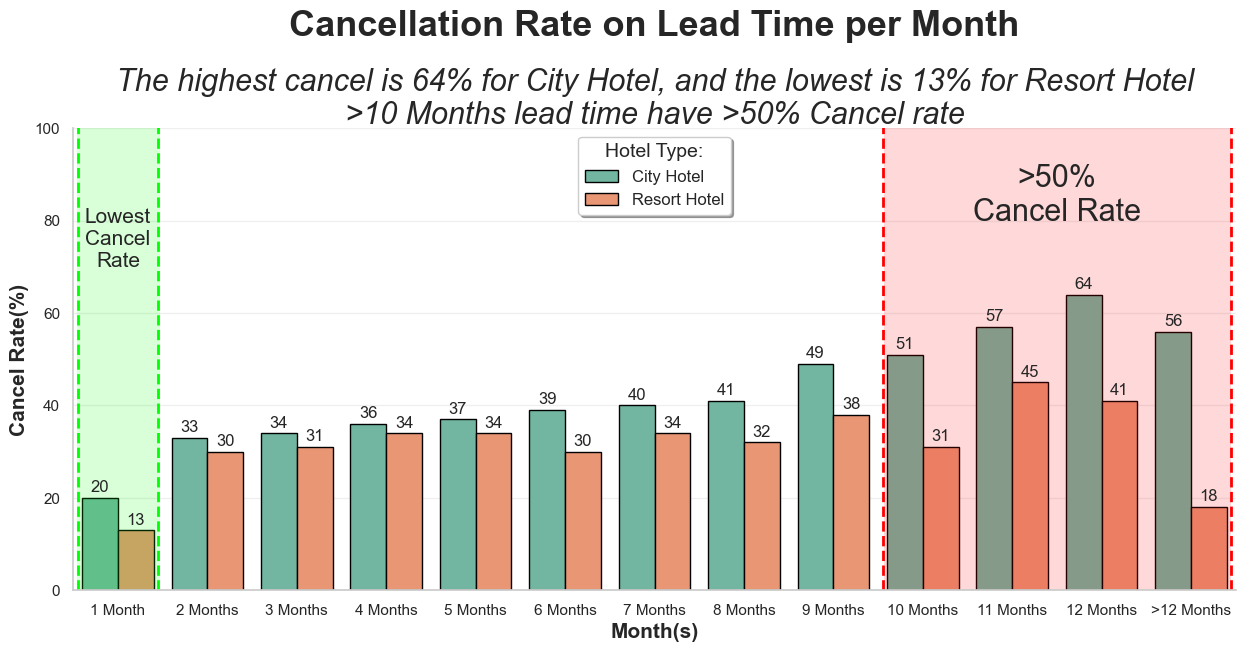

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.grid(alpha=0.3)
sns.set_theme( style='whitegrid', palette='Set2')
sns.barplot(x='lead_time_group',y='Cancel_Rate', hue= 'Hotel', data=df5_pivot, edgecolor = 'black',
            order = ['1 Month','2 Months','3 Months','4 Months','5 Months','6 Months',
                     '7 Months','8 Months','9 Months','10 Months','11 Months','12 Months', '>12 Months'])

plt.text(x=6, y=120, s='Cancellation Rate on Lead Time per Month', fontsize=26, fontweight='bold', ha= 'center')
plt.text(x=6, y=108, s='The highest cancel is 64% for City Hotel, and the lowest is 13% for Resort Hotel', fontsize=22, fontstyle='italic', ha= 'center')
plt.text(x=6, y=101, s=">10 Months lead time have >50% Cancel rate", fontsize=22, fontstyle='italic', ha= 'center')

plt.text(x=0, y=70, s="Lowest\nCancel\nRate", fontsize=15, ha= 'center')

plt.text(x=10.5, y=80, s=">50%\nCancel Rate", fontsize=22, ha= 'center')

plt.axvline(-0.45, color='lime', linestyle='--', ymin=0, ymax=2, lw = 2)
plt.axvline(0.45, color='lime', linestyle='--', ymin=0, ymax=2, lw = 2)
plt.axvline(0, color='lime', linestyle='-', ymin=0, ymax=2, lw = 60, alpha = .15)

plt.axvline(8.55, color='red', linestyle='--', ymin=0, ymax=2, lw = 2)
plt.axvline(12.45, color='red', linestyle='--', ymin=0, ymax=2, lw = 2)
plt.axvline(10.5, color='red', linestyle='-', ymin=0, ymax=2, lw = 250, alpha = .15)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.legend(title='Hotel Type:', title_fontsize=14, prop={'size':12}, fontsize='x-large', loc ="upper center", fancybox=True, shadow= True)
plt.xlabel('Month(s)', fontsize=15,fontweight='bold')
plt.ylabel('Cancel Rate(%)', fontsize=15,fontweight='bold')
plt.ylim(0,100)
plt.savefig('avg_num_booking.png', dpi=200)
sns.despine()